# Data-Driven Insights for a Modern Film Studio


# 1. Business Understanding

## 1.1 Overview
The global movie industry has undergone major shifts in recent years, with changes in consumer behavior, streaming trends, and content production strategies. Streaming platforms such as Netflix and Prime are reshaping how content is consumed and evaluated. While theatrical revenue remains an important success metric, online ratings, platform distribution and viewer engagement have become just as critical in predicting and evaluating a movie's performance.

As a new entrant in the movie production industry, understanding what drives a movie’s commercial success is crucial for making data-driven decisions in production, marketing, and distribution.

This project seeks to uncover actionable insights from historical movie data to uncover what drives both financial and audience success, and how this knowledge can inform business strategy for a potential new film studio.


## 1.2 Background
With increased competition from both traditional cinema and digital streaming platforms, studios need to optimize decisions around:

* Genre selection

* Budget allocation

* Casting

* Timing of releases

* Marketing focus

* Platform strategy - Balancing between the box office and streaming platforms

By analyzing both theatrical and streaming success, studios can better navigate this complex, hybrid distribution landscape. Data from past movies including box office revenue, ratings, genres, and production details can reveal patterns and predictors of success.

This analysis will serve as a proof of concept for how a data-driven approach can enhance Return on Investment(ROI) and reduce risk in movie production.


## 1.3 Objectives
The primary objectives of this project are:

1. To identify the key factors that contribute to a movie's success (e.g. revenue, high ratings, box office success, streaming performance)

2. To provide data-backed recommendations for genre selection, ideal budgets, release strategy and cast decisions

3. To build visualizations and models that support strategic decisions for a new movie production company


## 1.4 Problem Statement

A new movie production company is seeking to make informed decisions about:

* What types of movies to produce (genre, language, duration)

* How much budget to allocate

* When to release their movies

* Which actors or directors are most associated with successful projects

* Decide whether to prioritize theatrical releases, streaming or a hybrid model

The challenge is to analyze historical movie data to find patterns that can help predict which factors lead to higher box office performance or audience engagement.


## 1.5 Metrics of Success

* Identification of top 5 features most correlated with success metrics

* Creation of visual dashboards to communicate findings clearly

* Development of a simple predictive model for revenue or rating to estimate movie success

* Strategic, business-friendly recommendations based on findings

* Well-documented collaboration and communication via GitHub, Trello, and reporting tools


## 1.6 Tools & Technologies
- Python (Pandas, NumPy, Matplotlib, Seaborn, Scikit-learn)

- Jupyter Notebooks for analysis

- Git & GitHub for version control and collaboration

- Trello for project management and workflow tracking

- Google Docs for the final data report

- Google Slides for the Presentation

- Tableau for Interactive Dashboard


## 1.7 Stakeholders

The primary stakeholder is the founding team of the new movie production studio.

Secondary stakeholders include potential investors, marketing consultants, streaming partners and creative directors.

# 2. Data Understanding

In order to uncover what drives a movie’s success, both financially and in terms of audience reception, we must first develop a thorough understanding of the data at our disposal. This section explores the structure, scope, and quality of the datasets used for analysis.

Our data sources include publicly available movie datasets with information on:

* **Movie metadata**: title, genre, release date, language, runtime, production companies

* **Financial data**: production budget, box office revenue (domestic & worldwide)

* **Ratings**: IMDb scores, Rotten Tomatoes critic/audience ratings

* **Streaming availability**: whether the movie was released theatrically, via DVD or streaming, or both

* **Cast and crew**: actors, directors, and producers

The movie datasets are drawn from: 
* [Box Office Mojo](https://www.boxofficemojo.com/)
* [IMDb](https://www.imdb.com/)
* [Rotten Tomatoes](https://www.rottentomatoes.com/)
* [The Movie DB](https://www.themoviedb.org/)
* [The Numbers](https://www.the-numbers.com/)

The datasets are in the following formats:
* bom.movie_gross.csv (CSV File)
* im.db (sqLite Database)
* rt.movie_info.tsv (TSV File)
* rt.reviews.tsv (TSV File)
* tmdb.movies.csv (CSV File)
* tn.movie_budgets.csv (CSV File)

By reviewing the attributes of these datasets and exploring initial patterns, we aim to:

* *Identify which variables are relevant to our business goals and their data types*
* *Detect any missing, duplicated, or inconsistent records*
* *Gain early insights into data trends that may inform modeling later on*

This understanding will serve as the foundation for cleaning, feature engineering, and deeper analysis in the next stages of the project.

## 2.1 Importing Essential Libraries

Before diving into data exploration, we need to import the key Python libraries that will support our data analysis, visualization, and modeling tasks.

In [222]:
# Data manipulation and analysis
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# For dealing with SQLite Databases
import sqlite3

# For data cleaning 
from datetime import datetime 
import re   

import warnings
warnings.filterwarnings("ignore")

## 2.2 Initial Data Exploration of Box Office Mojo Data

In this section, we begin exploring the raw box office dataset to understand its structure, completeness, and key variables. This includes checking for missing values, data types, duplicates, and overall distribution of records.

In [223]:
# load the box office mojo dataset
bom_df = pd.read_csv("bom.movie_gross.csv")

In [224]:
# preview the first 5 rows
bom_df.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [225]:
#preview the last 5 rows
bom_df.tail()

,title,studio,domestic_gross,foreign_gross,year
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018
3386,An Actor Prepares,Grav.,1700.0,NaN,2018


In [226]:
# get the shape of the dataframe
print(f"The box office mojo dataset has {bom_df.shape[0]} rows.")
print(f"The box office mojo dataset has {bom_df.shape[1]} columns.")

The box office mojo dataset has 3387 rows.
The box office mojo dataset has 5 columns.


In [227]:
# summary information on the dataframe
bom_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [228]:
# creating an overview of key summary data on the dataset
data_dict = pd.DataFrame({
   "Column Name": bom_df.columns,
    "Data Type": bom_df.dtypes,
    "Missing Values": bom_df.isnull().sum(),
    "Unique Values": bom_df.nunique()
})

data_dict

,Column Name,Data Type,Missing Values,Unique Values
title,title,object,0,3386
studio,studio,object,5,257
domestic_gross,domestic_gross,float64,28,1797
foreign_gross,foreign_gross,object,1350,1204
year,year,int64,0,9


In [229]:
#checking for duplicates
print(f"The Box Office Movie dataset has {bom_df.duplicated().sum()} duplicates.")

The Box Office Movie dataset has 0 duplicates.


## Observations

The dataframe comprises of **3387 rows** and **5 columns**.

The dataset is uniform from top to bottom on inspection of the first 5 rows and last 5 rows.

### Columns

The dataset contains 5 columns with the following information:
* Information on the movie's title, the studio that produced it and the year when it was produced
* Gross earnings from the movie (this has been categorised into the earnings from the domestic market and the foreign market). This information will help us in comparison of the performance of a movie in the foreign and domestic market

### Data Types 

The summary information of the data frame reveals two datatypes:
* Categorical Data (3 columns: title, studio and foreign_gross)
* Numerical Data (2 columns: domestic_gross and year) 

We note that there will be need for data cleaning as follows:
 * Change the year column from numerical datatype(int) to datetime
 * Change the foreign_gross column from categorical datatype(object) to numerical datatype(float)

### Missing Data

3 columns have null values as follows:
  * *studio*
  * *domestic_gross*
  * *foreign_gross*

## 2.3 Initial Data Exploration of Rotten Tomatoes Data

In this section, we begin exploring the raw rotten tomatoes datasets to understand their structure, completeness, and key variables. This includes checking for missing values, data types, duplicates, and overall distribution of records.

### 2.3.1 Exploration of Movie Information Dataset

In [230]:
# loading the Rotten Tomatoes dataset
rtinfo_df = pd.read_csv("rt.movie_info.tsv", delimiter="\t")

In [231]:
#checking the first 5 rows
rtinfo_df.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [232]:
#checking the last 5 rows
rtinfo_df.tail()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
1555,1996,Forget terrorists or hijackers -- there's a ha...,R,Action and Adventure|Horror|Mystery and Suspense,NaN,NaN,"Aug 18, 2006","Jan 2, 2007",$,"33,886,034",106 minutes,New Line Cinema
1556,1997,The popular Saturday Night Live sketch was exp...,PG,Comedy|Science Fiction and Fantasy,Steve Barron,Terry Turner|Tom Davis|Dan Aykroyd|Bonnie Turner,"Jul 23, 1993","Apr 17, 2001",NaN,NaN,88 minutes,Paramount Vantage
1557,1998,"Based on a novel by Richard Powell, when the l...",G,Classics|Comedy|Drama|Musical and Performing Arts,Gordon Douglas,NaN,"Jan 1, 1962","May 11, 2004",NaN,NaN,111 minutes,NaN
1558,1999,The Sandlot is a coming-of-age story about a g...,PG,Comedy|Drama|Kids and Family|Sports and Fitness,David Mickey Evans,David Mickey Evans|Robert Gunter,"Apr 1, 1993","Jan 29, 2002",NaN,NaN,101 minutes,NaN
1559,2000,"Suspended from the force, Paris cop Hubert is ...",R,Action and Adventure|Art House and Internation...,NaN,Luc Besson,"Sep 27, 2001","Feb 11, 2003",NaN,NaN,94 minutes,Columbia Pictures


In [233]:
# get the shape of the dataframe
print(f"The Rotten Tomatoes Movie Info dataset has {rtinfo_df.shape[0]} rows.")
print(f"The Rotten Tomatoes Movie Info dataset has {rtinfo_df.shape[1]} columns.")

The Rotten Tomatoes Movie Info dataset has 1560 rows.
The Rotten Tomatoes Movie Info dataset has 12 columns.


In [234]:
# summary information on the dataframe
rtinfo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


In [235]:
#getting a summary overview of data

data_dict = pd.DataFrame({
    "Data Type": rtinfo_df.dtypes,
    "Missing Values": rtinfo_df.isnull().sum(),
    "Unique Values": rtinfo_df.nunique()
})

data_dict

,Data Type,Missing Values,Unique Values
id,int64,0,1560
synopsis,object,62,1497
rating,object,3,6
genre,object,8,299
director,object,199,1125
writer,object,449,1069
theater_date,object,359,1025
dvd_date,object,359,717
currency,object,1220,1
box_office,object,1220,336


In [236]:
#creating a description column for the information on the columns
data_dict["Description"] =[
        'Unique movie numeric identifier',
        'A brief summary of the movie\'s plot.',
        'MPAA film rating indicating audience suitability.',
        'Movie genres; may contain multiple genres.',
        'Name(s) of the director(s).',
        'Name(s) of the screenwriter(s).',
        'Date of release in theaters.',
        'Date of release on DVD.',
        'Currency of box office revenue.',
        'Box office earnings of the movie.',
        'Duration of the movie.',
        'Name of the production or distribution studio.'
    ]

data_dict

,Data Type,Missing Values,Unique Values,Description
id,int64,0,1560,Unique movie numeric identifier
synopsis,object,62,1497,A brief summary of the movie's plot.
rating,object,3,6,MPAA film rating indicating audience suitability.
genre,object,8,299,Movie genres; may contain multiple genres.
director,object,199,1125,Name(s) of the director(s).
writer,object,449,1069,Name(s) of the screenwriter(s).
theater_date,object,359,1025,Date of release in theaters.
dvd_date,object,359,717,Date of release on DVD.
currency,object,1220,1,Currency of box office revenue.
box_office,object,1220,336,Box office earnings of the movie.


In [237]:
print(f"The Rotten Tomatoes Movie Info dataset has {rtinfo_df.duplicated().sum()} duplicates.")

The Rotten Tomatoes Movie Info dataset has 0 duplicates.


In [238]:
rtinfo_df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,1560.0,1007.303846,579.164527,1.0,504.75,1007.5,1503.25,2000.0


In [239]:
rtinfo_df.describe(include = "O").T

,count,unique,top,freq
synopsis,1498,1497,A group of air crash survivors are stranded in...,2
rating,1557,6,R,521
genre,1552,299,Drama,151
director,1361,1125,Steven Spielberg,10
writer,1111,1069,Woody Allen,4
theater_date,1201,1025,"Jan 1, 1987",8
dvd_date,1201,717,"Jun 1, 2004",11
currency,340,1,$,340
box_office,340,336,"32,000,000",2
runtime,1530,142,90 minutes,72


## Observations

The Rotten Tomatoes Movie Info dataset comprises of **1560 rows** and **12 columns**.

The dataset is uniform from top to bottom on inspection of the first 5 rows and last 5 rows.

Each row appears to represent a unique movie identified by the id column.

### Columns

The dataset contains 12 columns with the following information:
* **Movie Metadata**: studio, genre, synopsis,rating, director,writer,theater date, dvd date and runtime 
* **Financial Data**: currency and Box office earnings from the movie.

### Data Types 

The summary information of the data frame reveals two datatypes:
* Categorical Data (11 columns: studio, genre, synopsis,rating, director,writer,theater date, dvd date, box office, currency and runtime )
* Numerical Data (1 column: id) 

We note that there will be need for data cleaning as follows:
 * Change the runtime column from categorical datatype(object) to numerical datatype(int)
 * Change the box_office column from categorical datatype(object) to numerical datatype(float/int)
 * Both theater_date and dvd_date are object datatypes and require parsing into datetime format for any time-based analysis.

### Missing Data
 
Some columns have significant missing values:

* currency and box_office have 78% missing values (1,220 out of 1,560 rows).

* studio is missing in over 1,000 rows, limiting studio-based analysis.

* writer and director also have notable gaps (449 and 199 missing values respectively).

* theater_date and dvd_date are missing in 359 rows each.

This will impact trend analysis over time or by revenue and there is therefore need to know how to handle the missing values in the next stage.

### 2.3.2 Exploration of Movie Reviews Dataset

In [240]:
# loading the Rotten Tomatoes Movie Reviews Dataset
rtreviews_df = pd.read_csv("rt.reviews.tsv", delimiter="\t", encoding="latin1")

In [241]:
#checking the first 5 rows
rtreviews_df.head()

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


In [242]:
#checking the last 5 rows
rtreviews_df.tail()

,id,review,rating,fresh,critic,top_critic,publisher,date
54427,2000,The real charm of this trifle is the deadpan c...,NaN,fresh,Laura Sinagra,1,Village Voice,"September 24, 2002"
54428,2000,NaN,1/5,rotten,Michael Szymanski,0,Zap2it.com,"September 21, 2005"
54429,2000,NaN,2/5,rotten,Emanuel Levy,0,EmanuelLevy.Com,"July 17, 2005"
54430,2000,NaN,2.5/5,rotten,Christopher Null,0,Filmcritic.com,"September 7, 2003"
54431,2000,NaN,3/5,fresh,Nicolas Lacroix,0,Showbizz.net,"November 12, 2002"


In [243]:
# get the shape of the dataframe
print(f"The Rotten Tomatoes Reviews dataset has {rtreviews_df.shape[0]} rows.")
print(f"The Rotten Tomatoes Movie Info dataset has {rtreviews_df.shape[1]} columns.")

The Rotten Tomatoes Reviews dataset has 54432 rows.
The Rotten Tomatoes Movie Info dataset has 8 columns.


In [244]:
#checking the summary data
rtreviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54432 entries, 0 to 54431
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          54432 non-null  int64 
 1   review      48869 non-null  object
 2   rating      40915 non-null  object
 3   fresh       54432 non-null  object
 4   critic      51710 non-null  object
 5   top_critic  54432 non-null  int64 
 6   publisher   54123 non-null  object
 7   date        54432 non-null  object
dtypes: int64(2), object(6)
memory usage: 3.3+ MB


In [245]:
#getting a summary overview of data

data_dict = pd.DataFrame({
    "Data Type": rtreviews_df.dtypes,
    "Missing Values": rtreviews_df.isnull().sum(),
    "Unique Values": rtreviews_df.nunique()
})

data_dict

,Data Type,Missing Values,Unique Values
id,int64,0,1135
review,object,5563,48682
rating,object,13517,186
fresh,object,0,2
critic,object,2722,3496
top_critic,int64,0,2
publisher,object,309,1281
date,object,0,5963


In [246]:
#creating a description column in our data dictionary
data_dict["Description"] = [
        'Unique numeric identifier',
        'Full text of the review written by the critic.',
        'Rating given by the critic.',
        'Indicates if the review is "fresh" (positive) or "rotten" (negative).',
        'Name of the critic who wrote the review.',
        'Binary indicator where 1 = top critic, 0 = not a top critic.',
        'Publication or outlet where the review was published.',
        'Date the review was published.'
]

data_dict

,Data Type,Missing Values,Unique Values,Description
id,int64,0,1135,Unique numeric identifier
review,object,5563,48682,Full text of the review written by the critic.
rating,object,13517,186,Rating given by the critic.
fresh,object,0,2,"Indicates if the review is ""fresh"" (positive) ..."
critic,object,2722,3496,Name of the critic who wrote the review.
top_critic,int64,0,2,"Binary indicator where 1 = top critic, 0 = not..."
publisher,object,309,1281,Publication or outlet where the review was pub...
date,object,0,5963,Date the review was published.


In [247]:
#checking summary numerical statistics
rtreviews_df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,54432.0,1045.706882,586.657046,3.0,542.0,1083.0,1541.0,2000.0
top_critic,54432.0,0.240594,0.427448,0.0,0.0,0.0,0.0,1.0


In [248]:
#checking summary categorical statistics
rtreviews_df.describe(include="O").T

,count,unique,top,freq
review,48869,48682,Parental Content Review,24
rating,40915,186,3/5,4327
fresh,54432,2,fresh,33035
critic,51710,3496,Emanuel Levy,595
publisher,54123,1281,eFilmCritic.com,673
date,54432,5963,"January 1, 2000",4303


## Observations

The Rotten Tomatoes Movie Reviews dataset comprises of **54432 rows** and **8 columns**.

The dataset is uniform from top to bottom on inspection of the first 5 rows and last 5 rows.

Each row appears to represent a movie review done by a critic.

### Columns

The dataset contains 8 columns with the following information:
* **Movie Review Metadata**: movie identifier id, review, rating, fresh, critic, top_critic, publisher and date 

The following columns are of key impact as follows: 

* **fresh**: Indicates whether a review is positive ("fresh") or negative ("rotten"), making it suitable for binary classification tasks.

* **top_critic**: Binary flag (1 = Top Critic, 0 = Regular Critic) that can be used to assess influence or credibility.

* **rating**: Contains non-standardized formats (e.g., "3/5", "7/10", "B+"), which will need normalization for numeric analysis.

### Data Types 

The summary information of the data frame reveals two datatypes:
* Categorical Data (6 columns: review, rating, fresh, critic, publisher, date)
* Numerical Data (2 columns: id and top_critic) 

We note that there will be need for data cleaning as follows:
 * The date is an object datatype and requires parsing into datetime format for any time-based analysis.
 * The rating may need to be further analysed and cleaned and converted into numerical datatype

### Missing Data
 
Some columns have significant missing values:

* review: 10% missing values 

* rating: 25% missing values — this could limit use in quantitative rating analysis.

* critic: 2,722 missing values 

* publisher: 309 missing values

These columns require handling based on analysis goals in the data preparation stage.

## 2.4 Initial Data Exploration of The Movie DB Dataset

In [249]:
# loading the dataset
tmdb_df = pd.read_csv("tmdb.movies.csv", index_col=0)

In [250]:
# previewing the first 5 rows
tmdb_df.head()

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [251]:
# previewing the last 5 rows
tmdb_df.tail()

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
26512,"[27, 18]",488143,en,Laboratory Conditions,0.6,2018-10-13,Laboratory Conditions,0.0,1
26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.6,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,"[14, 28, 12]",381231,en,The Last One,0.6,2018-10-01,The Last One,0.0,1
26515,"[10751, 12, 28]",366854,en,Trailer Made,0.6,2018-06-22,Trailer Made,0.0,1
26516,"[53, 27]",309885,en,The Church,0.6,2018-10-05,The Church,0.0,1


In [252]:
#checking the shape of the data
print(f"The Movie DB dataset has {tmdb_df.shape[0]} rows.")
print(f"The Movie DB dataset has {tmdb_df.shape[1]} columns.")

The Movie DB dataset has 26517 rows.
The Movie DB dataset has 9 columns.


In [253]:
# checking the summary information
tmdb_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26517 entries, 0 to 26516
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   genre_ids          26517 non-null  object 
 1   id                 26517 non-null  int64  
 2   original_language  26517 non-null  object 
 3   original_title     26517 non-null  object 
 4   popularity         26517 non-null  float64
 5   release_date       26517 non-null  object 
 6   title              26517 non-null  object 
 7   vote_average       26517 non-null  float64
 8   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 2.0+ MB


In [254]:
#getting a summary overview of data

data_dict = pd.DataFrame({
    "Missing Values": tmdb_df.isnull().sum(),
    "Unique Values": tmdb_df.nunique()
})

data_dict

,Missing Values,Unique Values
genre_ids,0,2477
id,0,25497
original_language,0,76
original_title,0,24835
popularity,0,7425
release_date,0,3433
title,0,24688
vote_average,0,91
vote_count,0,1693


In [255]:
#creating a description column in our data dictionary
data_dict["Description"] = [
        "List of genre IDs associated with the movie",
        "Unique TMDb movie identifier",
        "Original language of the movie",
        "Movie title in the original language",
        "A numeric measure of popularity",
        "Date the movie was released",
        "Title of the movie",
        "Average user rating on a scale of 0 to 10",
        "Total number of user votes received"
    ]

data_dict

,Missing Values,Unique Values,Description
genre_ids,0,2477,List of genre IDs associated with the movie
id,0,25497,Unique TMDb movie identifier
original_language,0,76,Original language of the movie
original_title,0,24835,Movie title in the original language
popularity,0,7425,A numeric measure of popularity
release_date,0,3433,Date the movie was released
title,0,24688,Title of the movie
vote_average,0,91,Average user rating on a scale of 0 to 10
vote_count,0,1693,Total number of user votes received


In [256]:
# checking for duplciates
tmdb_df.duplicated().sum()

1020

## Observations

The Movies DB dataset comprises of **26517 rows** and **9 columns**.

The dataset is uniform from top to bottom on inspection of the first 5 rows and last 5 rows.

Each row appears to represent the popularity and rating of a movie.

### Columns

The dataset contains 8 columns with the following information:
* **Movie Metadata**: Genre_ids, id, original_language,original_title,release_date, title
* **Performance Data**: popularity,vote_average and vote_count

### Data Types 

The summary information of the data frame reveals two datatypes:
* Categorical Data (5 columns: genre_ids, original_language, original_title, release_date, title)
* Numerical Data (4 columns: id, popularity, vote_average, vote_count) 

We note that there will be need for data cleaning as follows:
 * The release_date is an object datatype and requires parsing into datetime format for any time-based analysis.
 * The rating may need to be further analysed and cleaned and converted into numerical datatype

### Missing Data
 
All columns are complete which is ideal for modeling and visualisation.

### Duplicates

The dataset contains 1020 duplicated rows which will need to be dropped to prevent repetition/redundancy.

### Content Insights

* Genre_ids is encoded as a list of strings representing genre identifiers. There may be need to come up with a dictionary for the ids.

* Ratings and popularity (vote_average, vote_count, popularity) offer scope for ranking and trend analysis.

* Titles are stored in both original and localized forms hence there may be need to identify whether we will require both columns or only utilise one.

## 2.5 Initial Data Exploration of The Numbers Movie Budgets Dataset

In [257]:
# loading the dataset
tn_df = pd.read_csv("tn.movie_budgets.csv")

In [258]:
#checking the first 5 rows
tn_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [259]:
#checking the last 5 rows
tn_df.tail()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0
5781,82,"Aug 5, 2005",My Date With Drew,"$1,100","$181,041","$181,041"


In [260]:
# checking the shape of the dataframe
print(f"The Movie DB dataset has {tn_df.shape[0]} rows.")
print(f"The Movie DB dataset has {tn_df.shape[1]} columns.")

The Movie DB dataset has 5782 rows.
The Movie DB dataset has 6 columns.


In [261]:
# checking the summary information
tn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [262]:
#getting a summary overview of data

data_dict = pd.DataFrame({
    "Missing Values": tn_df.isnull().sum(),
    "Unique Values": tn_df.nunique()
})

data_dict

,Missing Values,Unique Values
id,0,100
release_date,0,2418
movie,0,5698
production_budget,0,509
domestic_gross,0,5164
worldwide_gross,0,5356


In [263]:
#creating a description column in our data dictionary
data_dict["Description"] = [
        "Unique identifier for each movie",
        "Official release date of the movie",
        "Title of the movie",
        "Total production budget in USD",
        "Revenue generated in the domestic market in USD",
        "Total worldwide revenue across all markets in USD"
    ]

data_dict

,Missing Values,Unique Values,Description
id,0,100,Unique identifier for each movie
release_date,0,2418,Official release date of the movie
movie,0,5698,Title of the movie
production_budget,0,509,Total production budget in USD
domestic_gross,0,5164,Revenue generated in the domestic market in USD
worldwide_gross,0,5356,Total worldwide revenue across all markets in USD


In [264]:
tn_df.duplicated().sum()

0

## Observations

The IMDb Movie Basics table comprises of **5782 rows** and **6 columns**.

The dataset is uniform from top to bottom on inspection of the first 5 rows and last 5 rows.

Each row appears to represent the financial performance of a movie.

### Columns

The dataset contains 6 columns with the following information:
* **Movie Metadata**: id, release_date, movie
* **Financial Performance Data**: production_budget, domestic_gross, worldwide_gross

### Data Types 

The summary information of the data frame reveals two datatypes:
* Categorical Data (5 columns:release_date, movie, production_budget, domestic_gross, worldwide_gross)
* Numerical Data (1 column: id) 

We note that there will be need for data cleaning as follows:
 * The release_date is an object datatype and requires parsing into datetime format for any time-based analysis.
 * Most numeric fields (production_budget, domestic_gross, worldwide_gross) are stored as object datatypes, likely due to currency symbols or commas — these will need to be cleaned and converted to integers or floats.
 * id field can serve as a primary key

### Missing Data
 
All columns are complete which is ideal for modeling and visualisation.

### Content Insights

* Budget and revenue fields can be used to calculate profitability or ROI.
* Global vs. domestic revenue can inform geographic market performance.

## 2.6 Initial Data Exploration of the IMDb Dataset

In [265]:
#importing the relevant library for connection to the database
import sqlite3

#connecting to the database
conn = sqlite3.connect("im.db")

In [266]:
#reading the tables in the database using pandas
table_df = pd.read_sql("""
SELECT name 
FROM sqlite_master 
WHERE type = 'table'
;""",conn)

#previewing the tables within the IMDb SqLite Database
table_df

,name
0,movie_basics
1,directors
2,known_for
3,movie_akas
4,movie_ratings
5,persons
6,principals
7,writers


### 2.6.1 Initial Data Exploration of the Movie Basics Table

In [267]:
#creating a dataframe for the movie basics table
df_mb = pd.read_sql("""
SELECT * 
FROM movie_basics 
;""",conn)

In [268]:
#checking the first 5 rows
df_mb.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [269]:
#checking the last 5 rows
df_mb.tail()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None
146143,tt9916754,Chico Albuquerque - Revelações,Chico Albuquerque - Revelações,2013,NaN,Documentary


In [270]:
#checking the summary information on the table
df_mb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [271]:
# get the shape of the dataframe
print(f"The IMDb Movie Basics table has {df_mb.shape[0]} rows.")
print(f"The IMDb Movie Basics table has {df_mb.shape[1]} columns.")

The IMDb Movie Basics table has 146144 rows.
The IMDb Movie Basics table has 6 columns.


In [272]:
#getting a summary overview of data

data_dict = pd.DataFrame({
    "Missing Values": df_mb.isnull().sum(),
    "Unique Values": df_mb.nunique()
})

data_dict

,Missing Values,Unique Values
movie_id,0,146144
primary_title,0,136071
original_title,21,137773
start_year,0,19
runtime_minutes,31739,367
genres,5408,1085


In [273]:
#creating a description column in our data dictionary
data_dict["Description"] =[
        "Unique identifier for each movie entry",
        "The main title of the movie",
        "The original title of the movie (native language)",
        "The year the movie was released",
        "Total duration of the movie in minutes",
        "Genres associated with the movie"
    ]

data_dict

,Missing Values,Unique Values,Description
movie_id,0,146144,Unique identifier for each movie entry
primary_title,0,136071,The main title of the movie
original_title,21,137773,The original title of the movie (native language)
start_year,0,19,The year the movie was released
runtime_minutes,31739,367,Total duration of the movie in minutes
genres,5408,1085,Genres associated with the movie


## Observations

The IMDb Movie Basics Table Comprises of **146,144 rows** and **6 columns**.

The dataset is uniform from top to bottom on inspection of the first 5 rows and last 5 rows.

The table represents a wide collection of films likely including both mainstream and lesser known titles.

### Columns

The dataset contains 6 columns with the following information:
* **Movie Metadata**: movie_id, primary_title, original_title, start_year, runtime_minutes and genres

### Data Types 

The summary information of the data frame reveals two datatypes:
* Categorical Data (4 columns:movie_id, primary_title, original_title,genres)
* Numerical Data (2 columns: start_year and runtime_minutes) 

We note that there will be need for data cleaning as follows:
 * The start_year is an integer datatype and requires parsing into datetime format or categorical datatype for any time-based analysis.

### Missing Data

Some columns have significant missing values as follows:
 
* *original_title*: 21 missing values — most titles have both primary and original names so we can impute with the primary name.

* *runtime_minutes*: ~21.7% (31,739 rows) are missing — may indicate shorts, unlisted durations, or incomplete data. This may be imputed with the mean, median or mode.

* *genres*: ~3.7% (5,408 rows) missing — genre information is mostly complete but still worth flagging and would require to be handled in the next stage either by dropping rows with null values or imputing with the mode.

### Content Insights

* movie_id appears unique and can be used as a primary key for joining with other IMDb datasets.

* genres may contain multiple genres per movie, separated by commas we may want to parse or one-hot encode them depending on our use case.

* runtime_minutes may require imputation or exclusion from time-based analysis.

### 2.6.2 Initial Data Exploration of the Directors Table

In [274]:
#creating a dataframe for the table
dir_df = pd.read_sql("""
SELECT *
FROM directors
;""",conn)

In [275]:
#checking the first 5 rows
dir_df.head()

,movie_id,person_id
0,tt0285252,nm0899854
1,tt0462036,nm1940585
2,tt0835418,nm0151540
3,tt0835418,nm0151540
4,tt0878654,nm0089502


In [276]:
#checking the last 5 rows
dir_df.tail()

,movie_id,person_id
291169,tt8999974,nm10122357
291170,tt9001390,nm6711477
291171,tt9001494,nm10123242
291172,tt9001494,nm10123248
291173,tt9004986,nm4993825


In [277]:
# get the shape of the dataframe
print(f"The IMDb Directors table has {dir_df.shape[0]} rows.")
print(f"The IMDb Directors table has {dir_df.shape[1]} columns.")

The IMDb Directors table has 291174 rows.
The IMDb Directors table has 2 columns.


In [278]:
dir_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 291174 entries, 0 to 291173
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   movie_id   291174 non-null  object
 1   person_id  291174 non-null  object
dtypes: object(2)
memory usage: 4.4+ MB


In [279]:
#getting a summary overview of data

data_dict = pd.DataFrame({
    "Missing Values": dir_df.isnull().sum(),
    "Unique Values": dir_df.nunique()
})

data_dict

,Missing Values,Unique Values
movie_id,0,140417
person_id,0,109253


In [280]:
dir_df.duplicated().sum()

127639

## Observations

### Dataset Overview
- **Entries**: 291,174 rows  
- **Columns**: 2 — `movie_id`, `person_id`  
- Each row represents a director assigned to a movie.

### Missing values
- No missing values in either column.
- `movie_id` connects to the IMDb Movie Basics table.
- `person_id` connects to the persons table.

### Duplicates
- The table has 127,639 duplicates which would need to be dropped to avoid repetition. 

### Data Types
- Both columns are of type `object`.

### Potential Uses
- Identify the most prolific directors.
- Analyze trends by director over time or by genre.
- Combine with ratings or revenue data to evaluate director impact.

### Next Steps
- Check for and handle any duplicate `movie_id` + `person_id` rows.
- Join with the persons table to enrich analysis with actual names.
- Group by `person_id` to count number of movies per director.

### 2.6.3  Initial Data Exploration of the Known For Table

In [281]:
#creating a dataframe
kf_df = pd.read_sql("""
SELECT *
FROM known_for
;""",conn)

In [282]:
#checking the first 5 rows
kf_df.head()

,person_id,movie_id
0,nm0061671,tt0837562
1,nm0061671,tt2398241
2,nm0061671,tt0844471
3,nm0061671,tt0118553
4,nm0061865,tt0896534


In [283]:
#checking the last 5 rows
kf_df.tail()

,person_id,movie_id
1638255,nm9990690,tt9090932
1638256,nm9990690,tt8737130
1638257,nm9991320,tt8734436
1638258,nm9991320,tt9615610
1638259,nm9993380,tt8743182


In [284]:
# get the shape of the dataframe
print(f"The IMDb Known For table has {kf_df.shape[0]} rows.")
print(f"The IMDb Known For table has {kf_df.shape[1]} columns.")

The IMDb Known For table has 1638260 rows.
The IMDb Known For table has 2 columns.


In [285]:
#summary information of the table
kf_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1638260 entries, 0 to 1638259
Data columns (total 2 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   person_id  1638260 non-null  object
 1   movie_id   1638260 non-null  object
dtypes: object(2)
memory usage: 25.0+ MB


In [286]:
#getting a summary overview of data

data_dict = pd.DataFrame({
    "Missing Values": kf_df.isnull().sum(),
    "Unique Values": kf_df.nunique()
})

data_dict

,Missing Values,Unique Values
person_id,0,576444
movie_id,0,514781


In [287]:
kf_df.duplicated().sum()

0

## Observations

- **Rows:** 1,638,260
- **Columns:** 2 (`person_id`, `movie_id`)
- **Missing Values:** None
- **Data Types:** Both columns are of type `object`
- Represents a **many-to-many relationship** between people and movies they are known for.
- Useful for identifying key works of individuals.
- Can be joined with `persons` or `movie_basics` to provide more context.

### Use Cases:
* Enhancing a profile view of persons in the database (e.g., "Top 5 movies known for...")

* Prioritizing popular or significant movies when merging datasets.

* Filtering people by prominence based on how many movies they're known for.

### 2.6.4  Initial Data Exploration of the Movie AKAs Table

In [288]:
aka_df = pd.read_sql("""
SELECT *
FROM movie_akas
;""",conn)

In [289]:
#checking the first 5 rows
aka_df.head()

,movie_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,None,None,0.0
1,tt0369610,11,Jurashikku warudo,JP,None,imdbDisplay,None,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,None,imdbDisplay,None,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,None,None,short title,0.0
4,tt0369610,14,Jurassic World,FR,None,imdbDisplay,None,0.0


In [290]:
#checking the last 5 rows
aka_df.tail()

,movie_id,ordering,title,region,language,types,attributes,is_original_title
331698,tt9827784,2,Sayonara kuchibiru,None,None,original,None,1.0
331699,tt9827784,3,Farewell Song,XWW,en,imdbDisplay,None,0.0
331700,tt9880178,1,La atención,None,None,original,None,1.0
331701,tt9880178,2,La atención,ES,None,None,None,0.0
331702,tt9880178,3,The Attention,XWW,en,imdbDisplay,None,0.0


In [291]:
# get the shape of the dataframe
print(f"The IMDb Movie AKAs table has {aka_df.shape[0]} rows.")
print(f"The IMDb Movie AKAs table has {aka_df.shape[1]} columns.")

The IMDb Movie AKAs table has 331703 rows.
The IMDb Movie AKAs table has 8 columns.


In [292]:
# getting the summary information
aka_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 331703 entries, 0 to 331702
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   movie_id           331703 non-null  object 
 1   ordering           331703 non-null  int64  
 2   title              331703 non-null  object 
 3   region             278410 non-null  object 
 4   language           41715 non-null   object 
 5   types              168447 non-null  object 
 6   attributes         14925 non-null   object 
 7   is_original_title  331678 non-null  float64
dtypes: float64(1), int64(1), object(6)
memory usage: 20.2+ MB


In [293]:
#getting a summary overview of data

data_dict = pd.DataFrame({
    "Missing Values": aka_df.isnull().sum(),
    "Unique Values": aka_df.nunique()
})

data_dict

,Missing Values,Unique Values
movie_id,0,122302
ordering,0,61
title,0,252781
region,53293,213
language,289988,76
types,163256,10
attributes,316778,77
is_original_title,25,2


In [294]:
# checking for duplicats
aka_df.duplicated().sum()

0

## Observations

- **Entries:** 331,703
- **Columns:** 8
- Contains alternate movie titles across various **regions** and **languages**.

Key columns:
  - `movie_id`, `title`, `region`, `language`, `is_original_title`

### Missing Values
-  `language`, `types`, and `attributes` have substantial missing data.
-  `is_original_title` is mostly complete; can help filter original names.


### Insights 
- There are many alternate titles per movie, helping to handle internationalization and regional release data.

- High missing values in language, types, and especially attributes means these may need to be dropped or used cautiously.

- The column is_original_title can help identify the main title among multiple entries per movie.

### Use Cases
We can use this table for:
  - Title localization
  - International release analysis
  - Cross-referencing alternate names

### 2.6.5  Initial Data Exploration of the Movie Ratings Table

In [295]:
# creating the dataframe
movie_ratings_df = pd.read_sql("""
SELECT *
FROM movie_ratings
;""",conn)

In [296]:
# checking the first 5 rows
movie_ratings_df.head()

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [297]:
# checking the last 5 rows
movie_ratings_df.tail()

,movie_id,averagerating,numvotes
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5
73855,tt9894098,6.3,128


In [298]:
# get the shape of the dataframe
print(f"The IMDb Movie Ratings table has {movie_ratings_df.shape[0]} rows.")
print(f"The IMDb Movie Ratings table has {movie_ratings_df.shape[1]} columns.")

The IMDb Movie Ratings table has 73856 rows.
The IMDb Movie Ratings table has 3 columns.


In [299]:
# checking the summary information
movie_ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movie_id       73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


In [300]:
#getting a summary overview of data

data_dict = pd.DataFrame({
    "Missing Values": movie_ratings_df.isnull().sum(),
    "Unique Values": movie_ratings_df.nunique()
})

data_dict

,Missing Values,Unique Values
movie_id,0,73856
averagerating,0,91
numvotes,0,7349


### Data Dictionary – IMDb Movie Ratings Table

| Column Name     | Data Type | Description                                                                 |
|------------------|-----------|-----------------------------------------------------------------------------|
| movie_id         | object    | Unique identifier for each movie (links to movie_basics and other tables). |
| averagerating    | float64   | The average IMDb rating for the movie, based on user submissions.          |
| numvotes         | int64     | Total number of user votes contributing to the average rating.             |

In [301]:
# checking for duplicates
movie_ratings_df.duplicated().sum()

0

### Summary Observations – Movie Ratings Table

- The table contains 73,856 entries, each corresponding to a unique movie (movie_id). 
- It has 3 columns (movie_id, average_rating and num_votes)

#### Missing Values
There are no missing values and no duplicates, meaning the dataset is complete and ready for analysis.

#### Insights and datatypes

- averagerating is a continuous variable (float64), representing the average user rating per movie, likely on a 0–10 scale.

- numvotes is an integer variable indicating the total number of votes a movie received. This can be used to assess popularity or confidence in the rating.


This dataset will be useful for analyzing audience reception and can complement revenue or critical review data for evaluating overall movie performance.

### 2.6.6  Initial Data Exploration of the Persons Table

In [302]:
persons_df = pd.read_sql("""
SELECT *
FROM persons
;""",conn)

In [303]:
# checking the first 5 rows
persons_df.head()

,person_id,primary_name,birth_year,death_year,primary_profession
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator"


In [304]:
# checking the last 5 rows
persons_df.tail()

,person_id,primary_name,birth_year,death_year,primary_profession
606643,nm9990381,Susan Grobes,NaN,NaN,actress
606644,nm9990690,Joo Yeon So,NaN,NaN,actress
606645,nm9991320,Madeline Smith,NaN,NaN,actress
606646,nm9991786,Michelle Modigliani,NaN,NaN,producer
606647,nm9993380,Pegasus Envoyé,NaN,NaN,"director,actor,writer"


In [305]:
# get the shape of the dataframe
print(f"The IMDb Persons table has {persons_df.shape[0]} rows.")
print(f"The IMDb Persons table has {persons_df.shape[1]} columns.")

The IMDb Persons table has 606648 rows.
The IMDb Persons table has 5 columns.


In [306]:
# checking the summary information
persons_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 606648 entries, 0 to 606647
Data columns (total 5 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   person_id           606648 non-null  object 
 1   primary_name        606648 non-null  object 
 2   birth_year          82736 non-null   float64
 3   death_year          6783 non-null    float64
 4   primary_profession  555308 non-null  object 
dtypes: float64(2), object(3)
memory usage: 23.1+ MB


In [307]:
#getting a summary overview of data

data_dict = pd.DataFrame({
    "Missing Values": persons_df.isnull().sum(),
    "Unique Values": persons_df.nunique()
})

data_dict

,Missing Values,Unique Values
person_id,0,606648
primary_name,0,577203
birth_year,523912,267
death_year,599865,214
primary_profession,51340,8647


### Data Dictionary – IMDb Persons Table

| Column Name         | Data Type | Description                                                              |
|---------------------|-----------|--------------------------------------------------------------------------|
| person_id           | object    | Unique identifier for each person.                                       |
| primary_name        | object    | The person’s name (e.g., actor, director, etc.).                         |
| birth_year          | float64   | Year of birth. May be missing for some individuals.                     |
| death_year          | float64   | Year of death. Null if the person is still alive or not recorded.       |
| primary_profession  | object    | Main professions (e.g., actor, director, producer), separated by commas.|


### Summary Observations – IMDb Persons Table

#### Size & Structure:

The table contains 606,648 records and 5 columns.

All columns are of type object or float64.

#### Key Identifiers:

- person_id is a unique identifier for each person and contains no missing values.

- primary_name is present for all records, representing names of individuals in the film industry.

#### Missing Data:

Birth year and death year have high values of missing data hence this may be dropped in the next stage.

primary_profession is missing in about 51,340 records (≈8.5%).This can be easily imputed. 

#### Data Characteristics:

The primary_profession column can contain multiple roles (e.g., "actor,director"), which may need to be split for detailed analysis.

The dataset provides an opportunity to analyze trends like:

1. Most common professions in the film industry.

2. Age distributions based on birth years.

3. Frequency of multiple roles per individual.

#### Cleaning Suggestions:

Handle missing birth and death years carefully, especially for age or lifespan-related analysis.

Consider separating professions into multiple columns or rows for multi-role individuals.

### 2.6.7  Initial Data Exploration of the Principals Table

In [308]:
principals_df = pd.read_sql("""
SELECT *
FROM principals
;""",conn)

In [309]:
#previewing the first 5 rows
principals_df.head()

,movie_id,ordering,person_id,category,job,characters
0,tt0111414,1,nm0246005,actor,None,"[""The Man""]"
1,tt0111414,2,nm0398271,director,None,None
2,tt0111414,3,nm3739909,producer,producer,None
3,tt0323808,10,nm0059247,editor,None,None
4,tt0323808,1,nm3579312,actress,None,"[""Beth Boothby""]"


In [310]:
#previewing the last 5 rows
principals_df.tail()

,movie_id,ordering,person_id,category,job,characters
1028181,tt9692684,1,nm0186469,actor,None,"[""Ebenezer Scrooge""]"
1028182,tt9692684,2,nm4929530,self,None,"[""Herself"",""Regan""]"
1028183,tt9692684,3,nm10441594,director,None,None
1028184,tt9692684,4,nm6009913,writer,writer,None
1028185,tt9692684,5,nm10441595,producer,producer,None


In [311]:
# get the shape of the dataframe
print(f"The IMDb Principals table has {principals_df.shape[0]} rows.")
print(f"The IMDb Principals table has {principals_df.shape[1]} columns.")

The IMDb Principals table has 1028186 rows.
The IMDb Principals table has 6 columns.


In [312]:
# getting summary information
principals_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1028186 entries, 0 to 1028185
Data columns (total 6 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   movie_id    1028186 non-null  object
 1   ordering    1028186 non-null  int64 
 2   person_id   1028186 non-null  object
 3   category    1028186 non-null  object
 4   job         177684 non-null   object
 5   characters  393360 non-null   object
dtypes: int64(1), object(5)
memory usage: 47.1+ MB


In [313]:
#getting a summary overview of data

data_dict = pd.DataFrame({
    "Missing Values": principals_df.isnull().sum(),
    "Unique Values": principals_df.nunique()
})

data_dict

,Missing Values,Unique Values
movie_id,0,143454
ordering,0,10
person_id,0,604546
category,0,12
job,850502,2965
characters,634826,174762


In [314]:
data_dict['Description'] = [
    "Unique identifier for the movie.",
    "Order of the person’s credit for the movie; used to rank importance or appearance.",
    "Unique identifier for the person.",
    "Role category of the person in the movie.",
    "Specific job title within the category.",
    "Name(s) of character(s) played for actors."
]

data_dict

,Missing Values,Unique Values,Description
movie_id,0,143454,Unique identifier for the movie.
ordering,0,10,Order of the person’s credit for the movie; us...
person_id,0,604546,Unique identifier for the person.
category,0,12,Role category of the person in the movie.
job,850502,2965,Specific job title within the category.
characters,634826,174762,Name(s) of character(s) played for actors.


In [315]:
principals_df.duplicated().sum()

0

## Summary Observations – IMDb Principals Table
1. Total Entries: 1,028,186 rows.

2. movie_id, ordering, person_id, category: No missing values.

3. job column has 83% missing values – this may be safely dropped.

4. characters column is 61.7% missing – common for non-acting roles or where character data wasn’t captured.

5. Each row links a person to a movie and their role (e.g., actor, director).

6. Many entries belong to categories like actor, actress, director, producer, etc.

### 2.6.8  Initial Data Exploration of the Writers Table

In [316]:
# converting into dataframe
writers_df = pd.read_sql("""
SELECT *
FROM writers
;""",conn)

In [317]:
#checking the first 5 rows
writers_df.head()

,movie_id,person_id
0,tt0285252,nm0899854
1,tt0438973,nm0175726
2,tt0438973,nm1802864
3,tt0462036,nm1940585
4,tt0835418,nm0310087


In [318]:
#checking the last 5 rows
writers_df.tail()

,movie_id,person_id
255868,tt8999892,nm10122246
255869,tt8999974,nm10122357
255870,tt9001390,nm6711477
255871,tt9004986,nm4993825
255872,tt9010172,nm8352242


In [319]:
# get the shape of the dataframe
print(f"The IMDb Writers table has {writers_df.shape[0]} rows.")
print(f"The IMDb Writers table has {writers_df.shape[1]} columns.")

The IMDb Writers table has 255873 rows.
The IMDb Writers table has 2 columns.


In [320]:
#get the summary information
writers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255873 entries, 0 to 255872
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   movie_id   255873 non-null  object
 1   person_id  255873 non-null  object
dtypes: object(2)
memory usage: 3.9+ MB


In [321]:
# getting summary of missing values and unique values
data_dict = pd.DataFrame({
    "Missing Values": principals_df.isnull().sum(),
    "Unique Values": principals_df.nunique()
})

data_dict

,Missing Values,Unique Values
movie_id,0,143454
ordering,0,10
person_id,0,604546
category,0,12
job,850502,2965
characters,634826,174762


### Summary Observations – IMDb Writers Table
**Total Records**: 255,873 entries.

**No Missing Data**: Both movie_id and person_id columns are complete.

**Table Purpose**: Maps movies to people credited as writers.

**Can Be Used For**: Identifying the writing contributors for a given film, or tracking writer productivity across films.

## Summary of Initial Data Exploration – IMDb SQLite Database

### Data Sources & Tables Explored
We explored 8 key tables from the IMDb SQLite database:
- `movie_basics`: Core movie info like title, genres, and runtime.
- `movie_akas`: Alternative titles and regions/language info.
- `movie_ratings`: Average ratings and number of votes.
- `principals`: Key cast/crew with roles, categories, and character names.
- `directors`: Mapping between movies and their directors.
- `writers`: Mapping between movies and writers.
- `persons`: Information on individuals (names, professions, life span).
- `known_for`: Movies people are known for.

### General Observations
- **Missing Values:** Present in optional fields like `characters`, `job`, `birth_year`, `language`, `attributes`.
- **High Cardinality:** Many unique values in `genres`, `primary_profession`, `original_title`, etc.
- **Duplicates & Repetitions:** Repeated IDs are expected; care is needed when merging to avoid duplication.
- **Data Types:** Most columns are object/string types; some need parsing (dates, floats, ints).
- **Linkages:** Tables are relational and link via `movie_id` and `person_id`.

### Key Challenges Identified
- **Data Normalization:** Role data exists across multiple tables and may need alignment.
- **Ambiguity in Roles:** `category` and `job` may have overlap; decisions needed on which to keep.
- **Sparse Columns:** Fields like `attributes`, `types` in `movie_akas` are mostly null.
- **Date Parsing Needed:** Fields like `release_date`, `birth_year` are stored as strings.

###  Plan for Data Preparation
- Impute, drop, or filter missing values.
- Convert strings to proper numeric or datetime formats.
- Standardize categorical fields like `genres` and `professions`.
- Merge tables only as needed to maintain memory efficiency and reduce redundancy.

In [322]:
# join movie_ratings with movie_basics table for bivariate analysis
ratings_with_genres = pd.read_sql("""
SELECT 
    mr.movie_id,
    mr.averagerating,
    mb.genres
FROM movie_ratings mr
JOIN movie_basics mb ON mr.movie_id = mb.movie_id
WHERE mb.genres IS NOT NULL
""", conn)

In [323]:
ratings_with_genres.head()

,movie_id,averagerating,genres
0,tt0063540,7.0,"Action,Crime,Drama"
1,tt0066787,7.2,"Biography,Drama"
2,tt0069049,6.9,Drama
3,tt0069204,6.1,"Comedy,Drama"
4,tt0100275,6.5,"Comedy,Drama,Fantasy"


In [324]:
ratings_with_genres.tail()

,movie_id,averagerating,genres
73047,tt9913056,6.2,Documentary
73048,tt9913084,6.2,Documentary
73049,tt9914286,8.7,"Drama,Family"
73050,tt9914642,8.5,Documentary
73051,tt9916160,6.5,Documentary


### Top Genre combinations by Average Rating
We plotted genre popolarity according to the ratings to find out the top 20 genres according to the data.

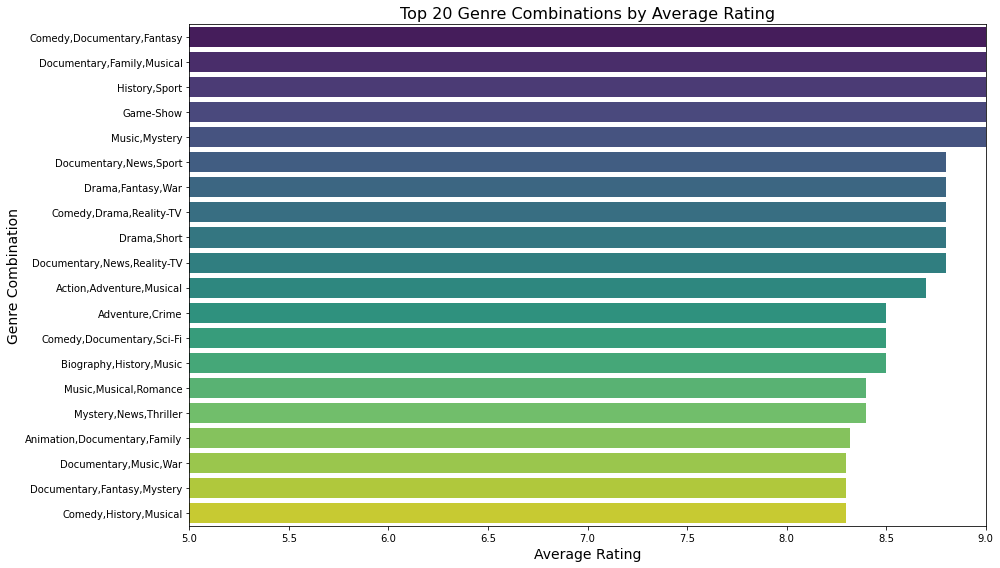

In [325]:
# Poppularity of genre combinations
plt.figure(figsize=(14, 8))
genre_means = ratings_with_genres.groupby('genres')['averagerating'].mean().sort_values(ascending=False)[:20]
sns.barplot(x=genre_means.values, y=genre_means.index, palette='viridis')
plt.title('Top 20 Genre Combinations by Average Rating', fontsize=16)
plt.xlabel('Average Rating', fontsize=14)
plt.ylabel('Genre Combination', fontsize=14)
plt.xlim(5, 9)
plt.tight_layout()
plt.show()

### General Observations
The top genre combinations are:-

- Comedy, Documentary, Fantasy
- Documentary, Family, Musical
- History, Sport
- Game-Show
- Music, Mystery
- Documentary, News, Sport
- Drama, Fantasy, War
- Comedy, Drama, Reality-TV
- Drama, Short
- Documentary, News, Reality-TV

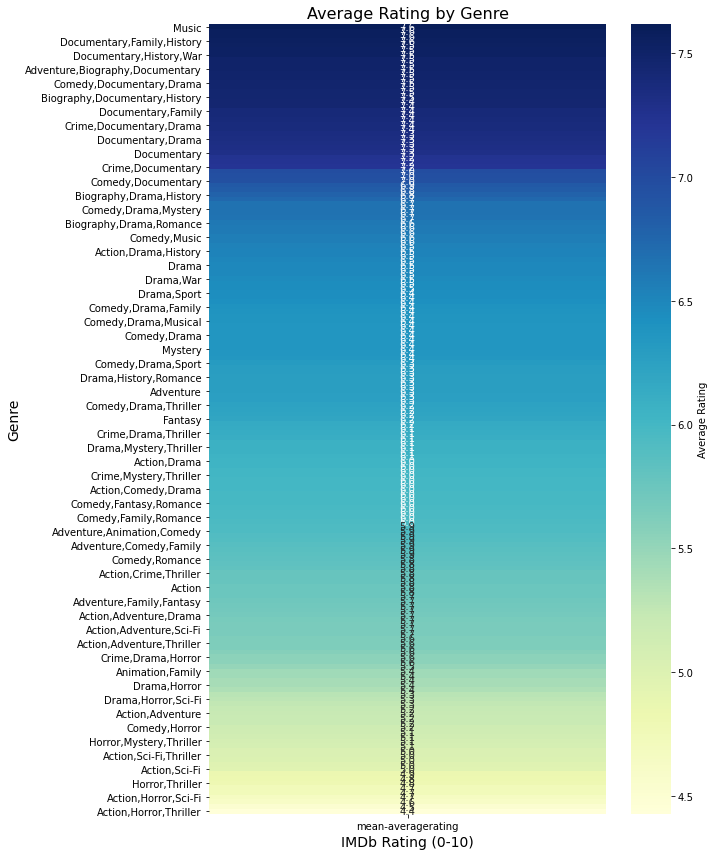

In [326]:
# Prepare genre-rating matrix
genre_rating = pd.pivot_table(
    data=ratings_with_genres,
    index='genres',
    values='averagerating',
    aggfunc=['mean', 'count']
).sort_values(('mean', 'averagerating'), ascending=False)

# Filter genres with sufficient movies
significant_genres = genre_rating[genre_rating[('count', 'averagerating')] >= 50]

# Visualize
plt.figure(figsize=(10, 12))
sns.heatmap(
    significant_genres[('mean', 'averagerating')].to_frame(),
    annot=True, fmt=".1f", cmap="YlGnBu",
    cbar_kws={'label': 'Average Rating'}
)
plt.title('Average Rating by Genre', fontsize=16)
plt.xlabel('IMDb Rating (0-10)', fontsize=14)
plt.ylabel('Genre', fontsize=14)
plt.tight_layout()
plt.show()

### Worst rated genre combinations


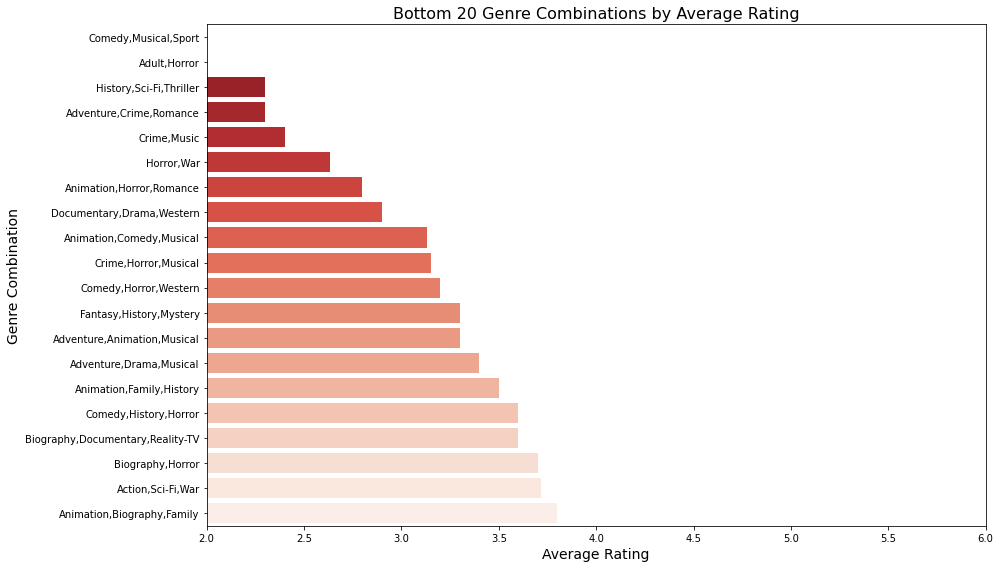

In [327]:
plt.figure(figsize=(14, 8))
bottom_genres = ratings_with_genres.groupby('genres')['averagerating'].mean().sort_values()[:20]
sns.barplot(x=bottom_genres.values, y=bottom_genres.index, palette='Reds_r')
plt.title('Bottom 20 Genre Combinations by Average Rating', fontsize=16)
plt.xlabel('Average Rating', fontsize=14)
plt.ylabel('Genre Combination', fontsize=14)
plt.xlim(2, 6)
plt.tight_layout()
plt.show()

 ### General Observations
#### **Documentary** dominates as the most frequent genre (appears in 4 combinations)
#### **Drama** appears in 3 mainstream combinations
 Typical groupings contain 2-3 genres
 Includes both film and TV-specific genres
- Comedy, Musical, Sport
- Adult, Horror 
- History, Sci-Fi, Thriller
- Adventure, Crime, Romance
- Crime, Music
- Horror, War
- Animation, Horror, Romance
- Documentary, Drama, Western
- Animation, Comedy, Musical
- Crime, Horror, Musical
- Comedy, Horror, Western
- Fantasy, History, Mystery
- Adventure, Animation, Musical
- Adventure, Drama, Musical

In [328]:
# Simple join of movie_basics and movie_ratings
runtime_ratings_df = pd.read_sql("""
SELECT 
    mb.movie_id,
    mb.primary_title,
    mb.runtime_minutes,
    mr.averagerating,
    mr.numvotes
FROM movie_basics mb
JOIN movie_ratings mr ON mb.movie_id = mr.movie_id
WHERE mb.runtime_minutes IS NOT NULL
""", conn)

In [329]:
runtime_ratings_df.head()

,movie_id,primary_title,runtime_minutes,averagerating,numvotes
0,tt0063540,Sunghursh,175.0,7.0,77
1,tt0066787,One Day Before the Rainy Season,114.0,7.2,43
2,tt0069049,The Other Side of the Wind,122.0,6.9,4517
3,tt0100275,The Wandering Soap Opera,80.0,6.5,119
4,tt0137204,Joe Finds Grace,83.0,8.1,263


### Genre Performance Analysis  
Understanding how runtime correlates with audience ratings is essential in an age dominated by short, engaging content. Analyzing which runtimes resonate most with viewers can help the studio tailor content for better reception and impact

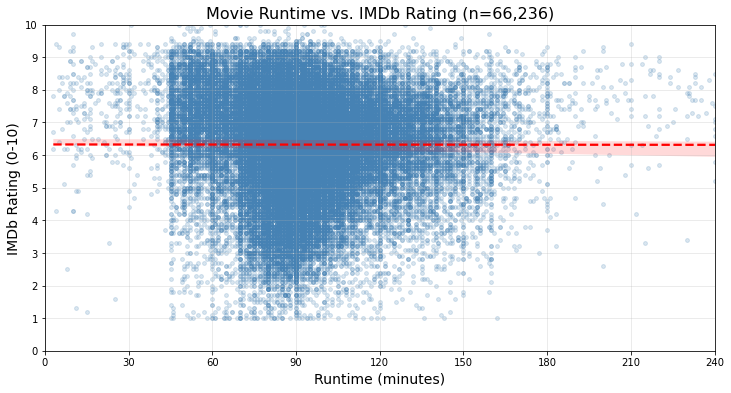

In [330]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))

# Scatter plot with proper axis ranges
sns.regplot(
    data=runtime_ratings_df,
    x='runtime_minutes',
    y='averagerating',
    scatter_kws={'alpha': 0.2, 's': 15, 'color': 'steelblue'},
    line_kws={'color': 'red', 'linestyle': '--'}
)

# Set axis limits and labels
plt.ylim(0, 10)  # Ratings range (0-10)
plt.xlim(0, 240)  # Runtime range (0-240 mins)
plt.yticks(range(0, 11, 1))  # Show every rating point
plt.xticks(range(0, 241, 30))  # Show every 30 minutes

plt.title('Movie Runtime vs. IMDb Rating (n=66,236)', fontsize=16)
plt.xlabel('Runtime (minutes)', fontsize=14)
plt.ylabel('IMDb Rating (0-10)', fontsize=14)
plt.grid(alpha=0.3)
plt.show()

### Observation
The optimal runtime range that receives the highest audience ratings falls between 40 and 120 minutes.

### Genre Profitability Analysis

This analysis identifies the **most financially successful movie genres** by calculating Return on Investment (ROI) using:
- Production budgets from The Numbers dataset
- Worldwide gross revenue data
- Genre classifications from IMDb

### Core Metrics Calculated
ROI = (Worldwide Gross - Production Budget) / Production Budget)

Columns in movie_basics: ['movie_id', 'primary_title', 'original_title', 'start_year', 'runtime_minutes', 'genres']
Columns in tn.movie_budgets: ['id', 'release_date', 'movie', 'production_budget', 'domestic_gross', 'worldwide_gross']


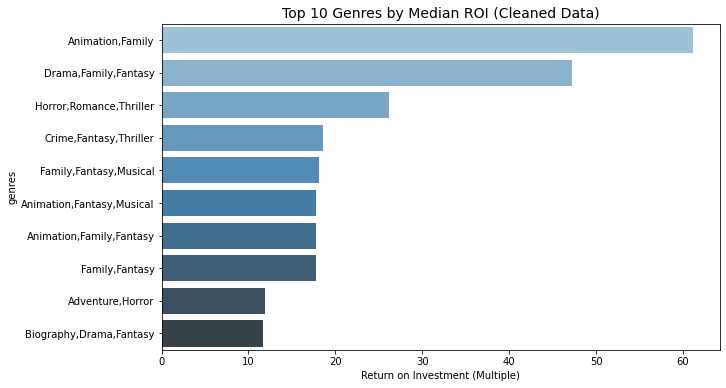

In [331]:
# check the column names in df_mb (movie_basics)
print("Columns in movie_basics:", df_mb.columns.tolist())

# column names in tn_df (movie budgets)
print("Columns in tn.movie_budgets:", tn_df.columns.tolist())

# merge (assuming 'primary_title' is actually called 'title' in df_mb)
try:
    genre_revenue = pd.merge(
        df_mb[['movie_id', 'primary_title', 'genres']],  # Adjusted column name
        tn_df[['movie', 'production_budget', 'worldwide_gross']],
        left_on='primary_title',
        right_on='movie',
        how='inner'
    )
    
    # Clean financial data
    genre_revenue['production_budget'] = genre_revenue['production_budget'].str.replace('[\$,]', '', regex=True).astype(float)
    genre_revenue['worldwide_gross'] = genre_revenue['worldwide_gross'].str.replace('[\$,]', '', regex=True).astype(float)
    
    # Calculate ROI
    genre_revenue['ROI'] = (genre_revenue['worldwide_gross'] - genre_revenue['production_budget']) / genre_revenue['production_budget']
    
    # Filter out extreme values
    #genre_revenue = genre_revenue[genre_revenue['production_budget'] > 100000]  # At least $100k budget
    
    # Plot top 10 genres by median ROI
    top_genres = genre_revenue.groupby('genres')['ROI'].median().sort_values(ascending=False)[:10]
    
    plt.figure(figsize=(10,6))
    sns.barplot(x=top_genres.values, y=top_genres.index, palette='Blues_d')
    plt.title('Top 10 Genres by Median ROI (Cleaned Data)', fontsize=14)
    plt.xlabel('Return on Investment (Multiple)')
    plt.show()

except KeyError as e:
    print(f"KeyError: {e}. Please verify the column names in your DataFrames.")
    print("Common alternatives: 'title', 'primary_title', 'movie_title'")

# Genre ROI Analysis Observations

## Top Performing Genres
1. **Animation & Family Dominate**  
   - 6 of top 10 genres contain either `Animation` or `Family`  
   - `Animation,Family` leads with highest median ROI (~60x)

2. **Fantasy's Strong Presence**  
   - Appears in 7 of top 10 combinations  
   - Best when paired with Family/Drama (not pure fantasy)

3. **Horror's Niche Success**  
   - `Adventure,Horror` makes top 10 despite horror's typically modest budgets  
   - `Horror,Romance,Thriller` hybrid performs exceptionally

Columns in movie_basics: ['movie_id', 'primary_title', 'original_title', 'start_year', 'runtime_minutes', 'genres']
Columns in tn.movie_budgets: ['id', 'release_date', 'movie', 'production_budget', 'domestic_gross', 'worldwide_gross']


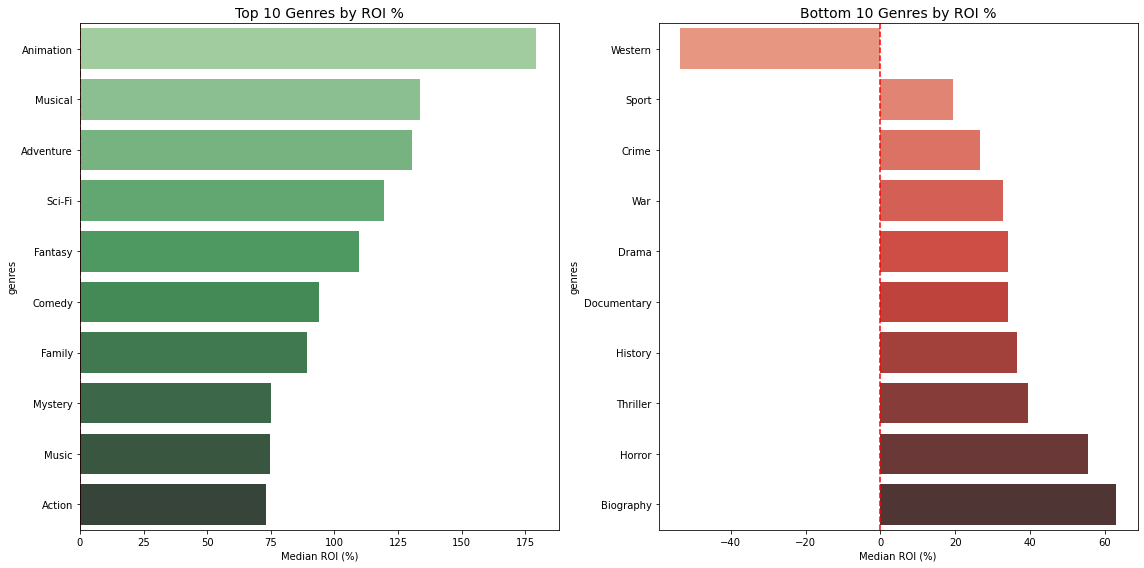


Genres with Lowest Median ROI %:
                median  count
genres                       
Western     -53.514432     25
Sport        19.389920     75
Crime        26.704591    393
War          32.900185     53
Drama        34.048408   1788
Documentary  34.067038    490
History      36.540392     96
Thriller     39.330956    577
Horror       55.603633    399
Biography    62.947388    244


In [332]:
# Check column names to ensure correct merging
print("Columns in movie_basics:", df_mb.columns.tolist())
print("Columns in tn.movie_budgets:", tn_df.columns.tolist())

# Merge data with error handling
try:
    # Use the correct title column name
    title_col = 'primary_title' if 'primary_title' in df_mb.columns else 'title'
    
    genre_revenue = pd.merge(
        df_mb[['movie_id', title_col, 'genres']],
        tn_df[['movie', 'production_budget', 'worldwide_gross']],
        left_on=title_col,
        right_on='movie',
        how='inner'
    )
    
    # Clean financial data
    for col in ['production_budget', 'worldwide_gross']:
        genre_revenue[col] = genre_revenue[col].str.replace('[\$,]', '', regex=True).astype(float)
    
    # Calculate ROI percentage
    genre_revenue['ROI_pct'] = ((genre_revenue['worldwide_gross'] - genre_revenue['production_budget']) / 
                               genre_revenue['production_budget']) * 100
    
    # Filter for meaningful analysis (budget > $100k)
    genre_revenue = genre_revenue[genre_revenue['production_budget'] > 100000]
    
    # Split multi-genre films into separate rows
    genre_revenue['genres'] = genre_revenue['genres'].str.split(',')
    genre_exploded = genre_revenue.explode('genres')
    genre_exploded['genres'] = genre_exploded['genres'].str.strip()
    
    # Calculate genre stats (require at least 15 films per genre)
    genre_stats = (genre_exploded.groupby('genres')['ROI_pct']
                  .agg(['median', 'count'])
                  .sort_values('median', ascending=False)
                  .query('count >= 15'))
    
    # Visualize top and bottom performers
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))
    
    # Top 10 genres
    top_10 = genre_stats.head(10)
    sns.barplot(x='median', y=top_10.index, data=top_10.reset_index(), 
                palette='Greens_d', ax=ax1)
    ax1.set_title('Top 10 Genres by ROI %', fontsize=14)
    ax1.set_xlabel('Median ROI (%)')
    ax1.axvline(0, color='red', linestyle='--')
    
    # Bottom 10 genres
    bottom_10 = genre_stats.tail(10).sort_values('median')
    sns.barplot(x='median', y=bottom_10.index, data=bottom_10.reset_index(), 
                palette='Reds_d', ax=ax2)
    ax2.set_title('Bottom 10 Genres by ROI %', fontsize=14)
    ax2.set_xlabel('Median ROI (%)')
    ax2.axvline(0, color='red', linestyle='--')
    
    plt.tight_layout()
    plt.show()
    
    # Print worst performers
    print("\nGenres with Lowest Median ROI %:")
    print(bottom_10[['median', 'count']])

except KeyError as e:
    print(f"Error: Column '{e}' not found. Please verify column names.")
    print("Try these alternatives:", df_mb.columns.intersection(['title', 'primary_title', 'movie_title']))

### Movie Genre ROI Analysis: Identifying Underperformers

### Analysis Purpose
This analysis identifies the **10 worst-performing movie genre combinations** by Return on Investment (ROI) to help:
- Avoid financial pitfalls in greenlight decisions
- Understand risky genre hybrids
- Guide budget allocation strategies

### Core Metric
ROI = (Worldwide Gross - Production Budget) / Production Budget)

Columns in movie_basics: ['movie_id', 'primary_title', 'original_title', 'start_year', 'runtime_minutes', 'genres']
Columns in tn.movie_budgets: ['id', 'release_date', 'movie', 'production_budget', 'domestic_gross', 'worldwide_gross']


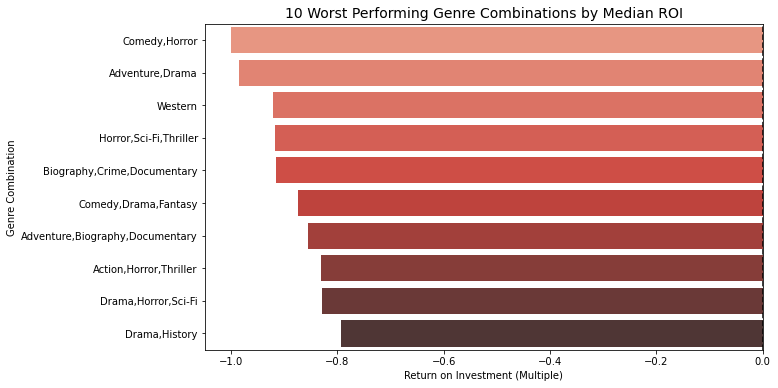

In [333]:
# Check column names
print("Columns in movie_basics:", df_mb.columns.tolist())
print("Columns in tn.movie_budgets:", tn_df.columns.tolist())

try:
    # Merge data
    genre_revenue = pd.merge(
        df_mb[['movie_id', 'primary_title', 'genres']],
        tn_df[['movie', 'production_budget', 'worldwide_gross']],
        left_on='primary_title',
        right_on='movie',
        how='inner'
    )
    
    # Clean financial data
    genre_revenue['production_budget'] = genre_revenue['production_budget'].str.replace('[\$,]', '', regex=True).astype(float)
    genre_revenue['worldwide_gross'] = genre_revenue['worldwide_gross'].str.replace('[\$,]', '', regex=True).astype(float)
    
    # Calculate ROI
    genre_revenue['ROI'] = (genre_revenue['worldwide_gross'] - genre_revenue['production_budget']) / genre_revenue['production_budget']
    
    # Filter for genres with at least 5 movies
    genre_counts = genre_revenue['genres'].value_counts()
    valid_genres = genre_counts[genre_counts >= 5].index
    genre_revenue = genre_revenue[genre_revenue['genres'].isin(valid_genres)]
    
    # Get bottom 10 genre combinations
    bottom_genres = genre_revenue.groupby('genres')['ROI'].median().sort_values(ascending=True)[:10]
    
    # Visualize
    plt.figure(figsize=(10,6))
    sns.barplot(
        x=bottom_genres.values,
        y=bottom_genres.index,
        palette='Reds_d',
        order=bottom_genres.index  # Maintain ascending order
    )
    plt.title('10 Worst Performing Genre Combinations by Median ROI', fontsize=14)
    plt.xlabel('Return on Investment (Multiple)')
    plt.ylabel('Genre Combination')
    plt.axvline(x=0, color='black', linestyle='--')  # Break-even line
    plt.show()

except KeyError as e:
    print(f"KeyError: {e}. Please verify the column names in your DataFrames.")
    print("Common alternatives: 'title', 'primary_title', 'movie_title'")

# Worst-Performing Genre Combinations: Critical Insights

## 💸 Financial Disaster Zone
- **All combinations lose money**  
  - Median ROI between -1.0x and -0.2x  
  - "Comedy,Horror" performs worst (-0.95x ROI) 
  - Even "best" underperformer ("Drama,History")

## Toxic Genre Patterns
1. **Horror Hybrids Struggle**  
   - Appears in 4/10 worst combos  
   - Particularly bad with:  
     - Sci-Fi 
     - Action/Thriller
     - Drama

2. **Documentary Dilemma**  
   - Fact-based genres crash when mixed with fiction:  
     - "Biography,Crime,Documentary"
     - "Adventure,Biography,Documentary" 

3. **Western Woes**  
   - Lone standalone genre in bottom 10  
   - Suggests Westerns need modern reinterpretation

## Red Flag Combinations

    - "Comedy,Horror"         
    - "Biography,Documentary"
    - "Horror,Sci-Fi"  
